In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        

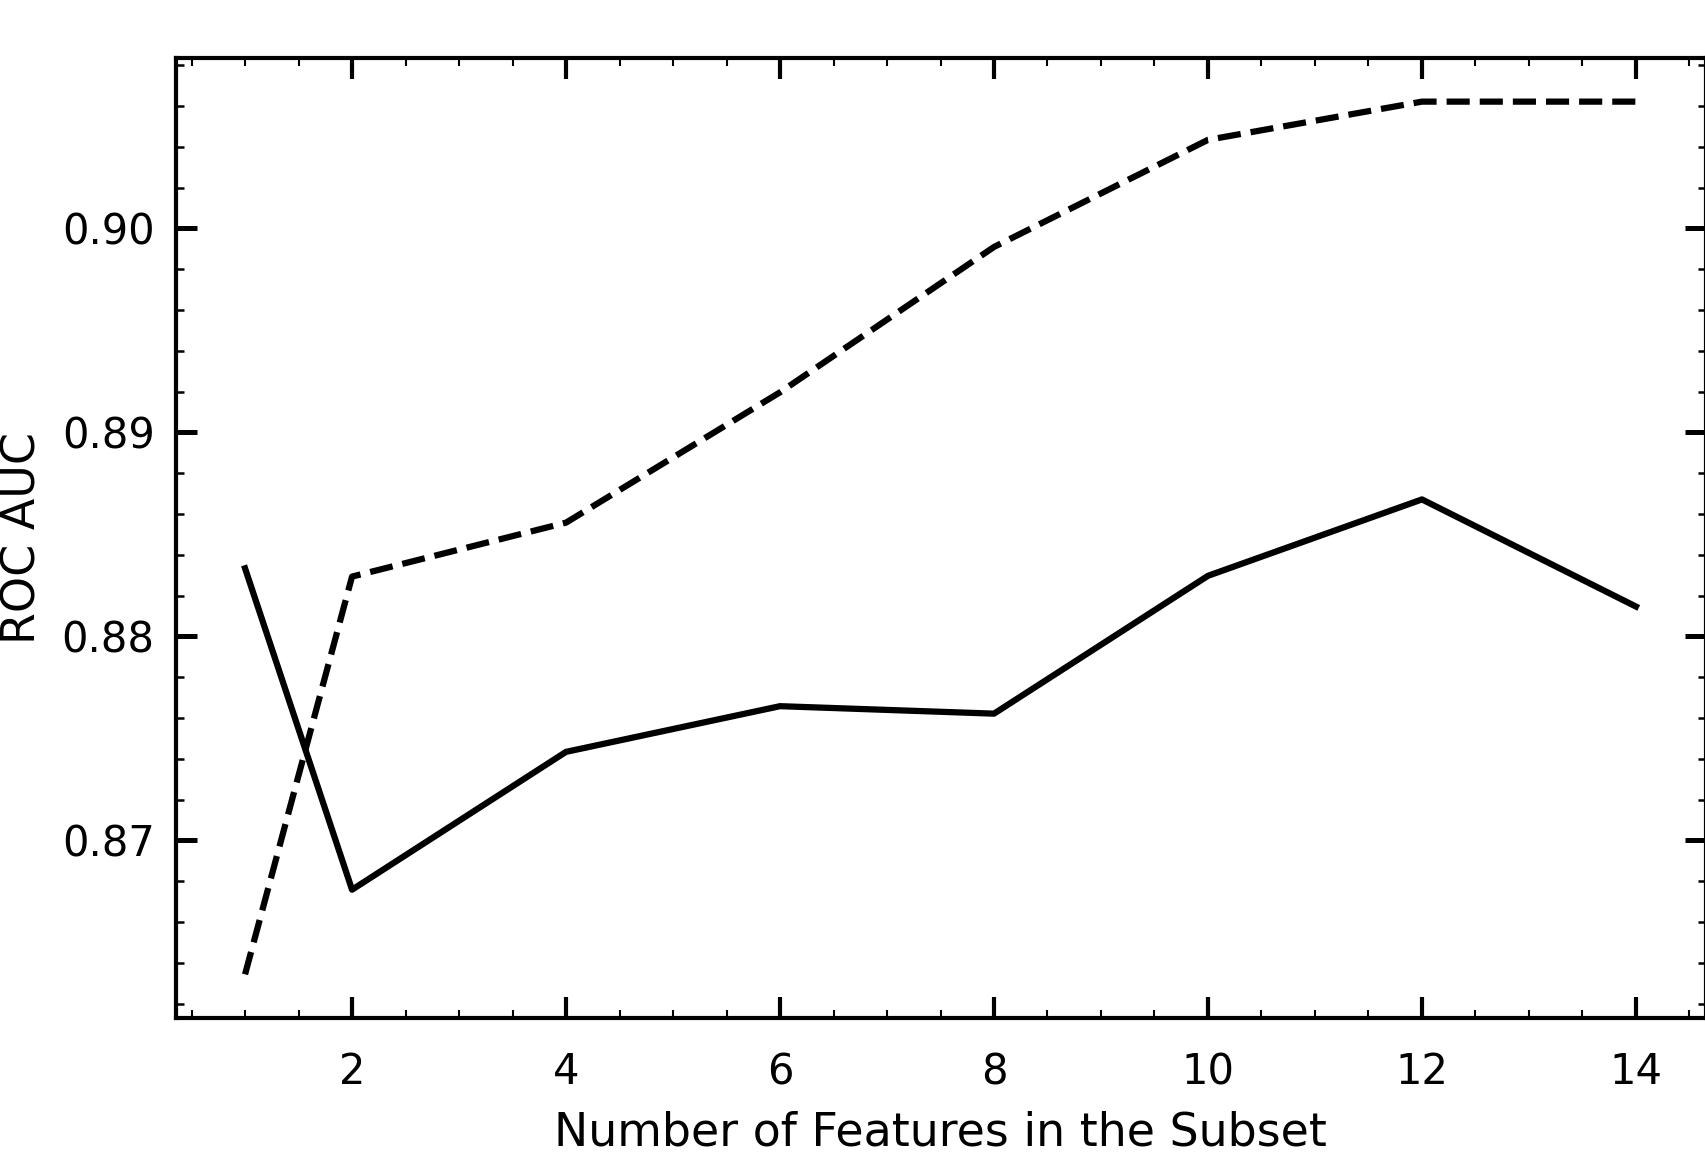

In [2]:
filter = np.zeros(8)
wrapper = np.zeros(8)

filtcsv = pd.read_csv('..\\Filter_Feature_Selection_Results\\num'+str(1)+'.csv')
filter[0] = filtcsv['ROC AUC'][0]
wrapcsv = pd.read_csv('..\\Wrapper_Feature_Selection_Results\\num'+str(1)+'.csv')
wrapper[0] = wrapcsv['ROC AUC'][0]
for i in range(1,8):
    filtresults = pd.read_csv('..\\Filter_Feature_Selection_Results\\num' + str(2*i) + '.csv')
    filter[i] = filtresults['ROC AUC'][0]
    wrapresults = pd.read_csv('..\\Wrapper_Feature_Selection_Results\\num' + str(2*i) + '.csv')    
    wrapper[i] = wrapresults['ROC AUC'][0]

xaxis = (1,2,4,6,8,10,12,14)

download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')

fig, ax = plt.subplots(figsize=(6,4),dpi=300)
ax.plot(xaxis,filter,label= 'Filter Method')
ax.plot(xaxis, wrapper, color = 'black',linestyle = '--', label = 'Wrapper Method')
ax.set_xlabel('Number of Features in the Subset',fontsize=11)
ax.set_ylabel('ROC AUC',fontsize=11)
#ax.legend(fontsize=11)
plt.title(' ')
plt.show()

Text(0, 0.5, 'ROC AUC')

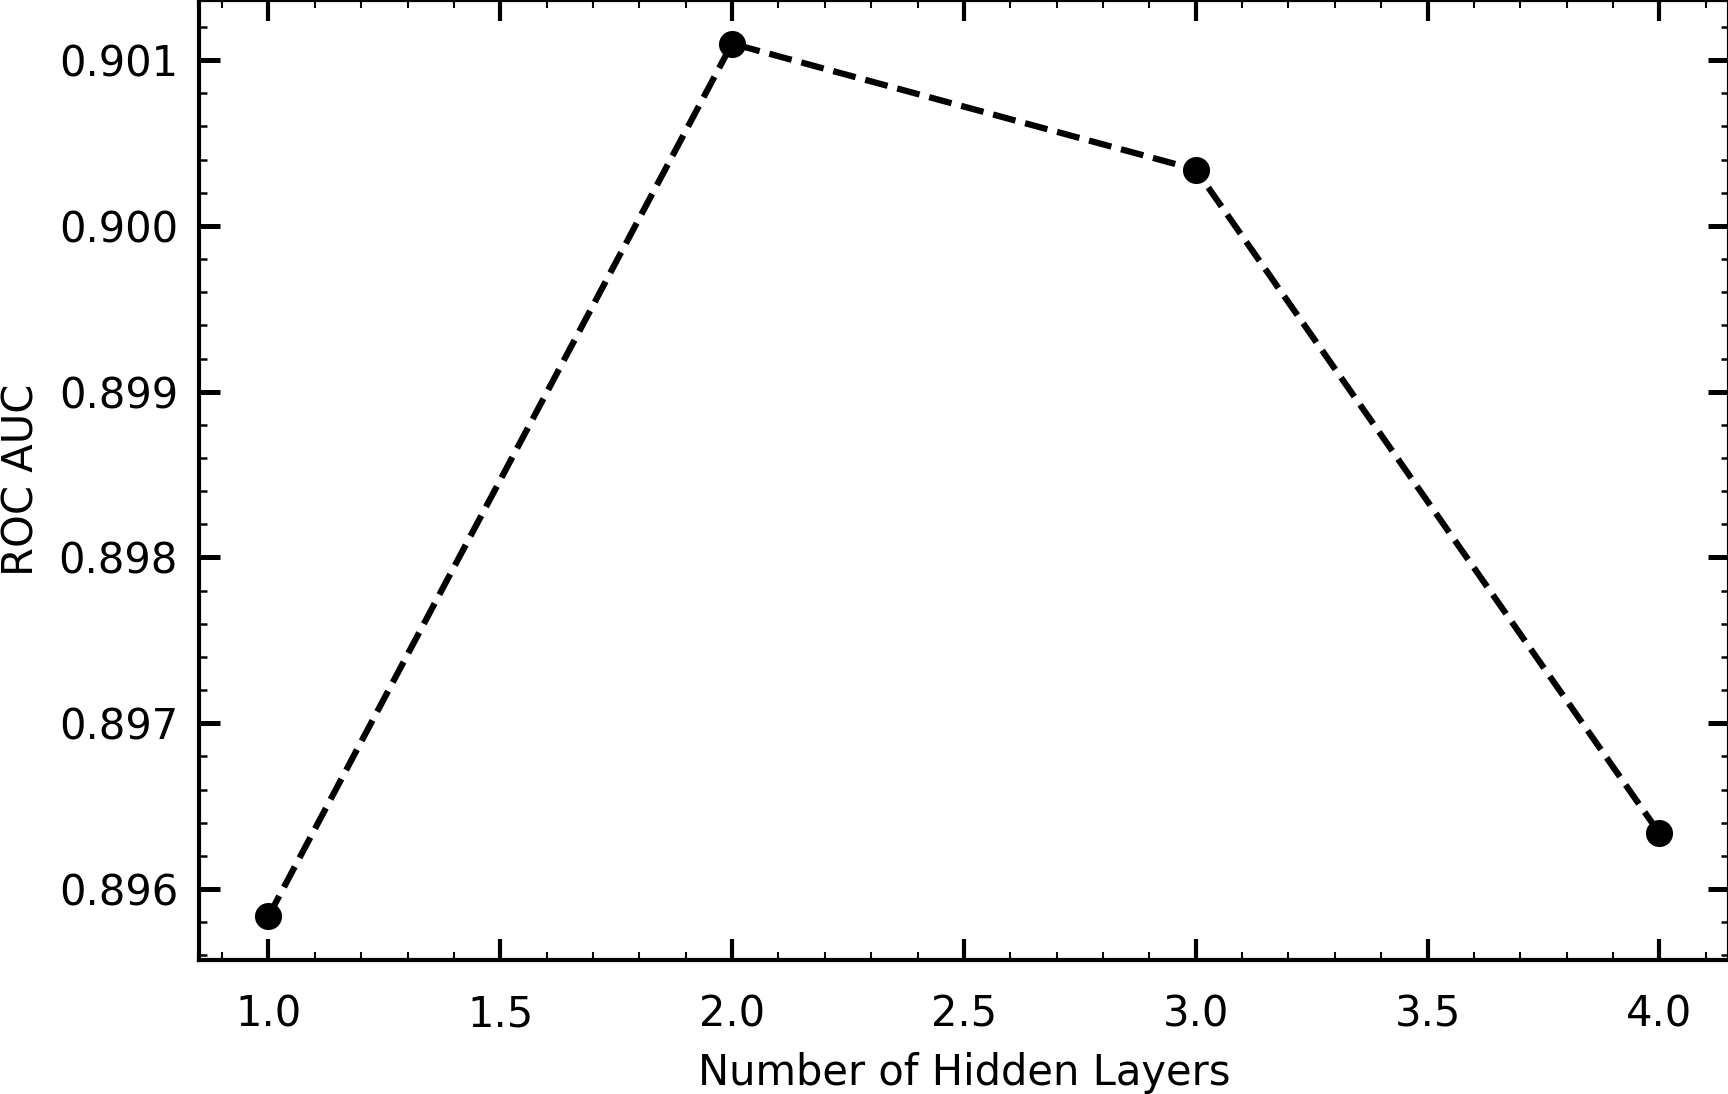

In [20]:

averages = np.zeros(4)

for k in range(1,5):
    avg = 0
    for i in range(0,3):
        data = pd.read_csv('..\\Hyperparam_results\\'+str(k)+'layer_' + str(i) + '.csv')
        avg+=data['ROC AUC'][0]
    averages[k-1] = avg/3
    

fig, ax = plt.subplots(figsize=(6,4),dpi=300)
ax.plot((1,2,3,4),averages,marker = 'o',markersize=6,linestyle = '--')
ax.set_xlabel('Number of Hidden Layers')
ax.set_ylabel('ROC AUC')